# Cross-Validation Analysis of Global Death Rates (1950-2023)

## Abstract
This study examines historical death rates across world regions from 1950 to 2023, employing various cross-validation techniques to evaluate predictive modeling approaches. We analyze the temporal patterns and regional variations in mortality rates, with particular attention to model stability and predictive accuracy.

## Introduction
Understanding global mortality trends is crucial for public health planning and policy development. This analysis aims to:
1. Evaluate different cross-validation approaches for time-series mortality data
2. Develop robust predictive models for death rates
3. Assess regional variations in mortality patterns

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import (
    KFold,
    TimeSeriesSplit,
    cross_val_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

## Data Loading and Preprocessing

In [3]:
# Load the dataset
df = pd.read_csv('annual-number-of-deaths-by-world-region.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\nFeatures:")
print(df.columns.tolist())

# Display first few rows
print("\nSample Data:")
display(df.head())

Dataset Overview:
Number of records: 18944
Number of features: 4

Features:
['Entity', 'Code', 'Year', 'Deaths - Sex: all - Age: all - Variant: estimates']

Sample Data:


,Entity,Code,Year,Deaths - Sex: all - Age: all - Variant: estimates
0,Afghanistan,AFG,1950,290972.0
1,Afghanistan,AFG,1951,288752.0
2,Afghanistan,AFG,1952,288059.0
3,Afghanistan,AFG,1953,287712.0
4,Afghanistan,AFG,1954,289189.0


## Data Analysis and Visualization

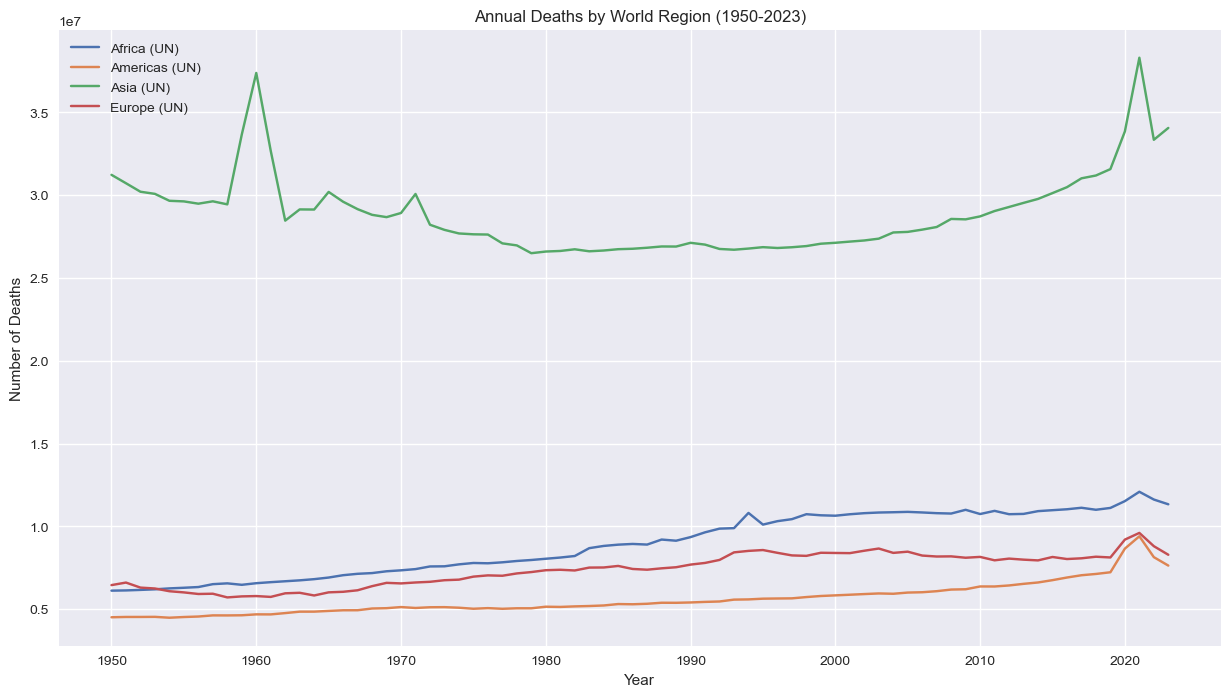

In [4]:
# Create time series visualization for major regions
major_regions = ['Africa (UN)', 'Americas (UN)', 'Asia (UN)', 'Europe (UN)']

plt.figure(figsize=(15, 8))
for region in major_regions:
    region_data = df[df['Entity'] == region]
    plt.plot(region_data['Year'], region_data['Deaths - Sex: all - Age: all - Variant: estimates'],
             label=region)

plt.title('Annual Deaths by World Region (1950-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

## Cross-Validation Analysis

We will implement and compare three cross-validation techniques:
1. Traditional K-Fold
2. Time Series Split
3. Rolling Window Validation

In [5]:
def prepare_data_for_modeling(df, region):
    """Prepare data for a specific region for modeling."""
    region_data = df[df['Entity'] == region].copy()
    X = region_data[['Year']]
    y = region_data['Deaths - Sex: all - Age: all - Variant: estimates']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

def evaluate_cv_methods(X, y):
    """Evaluate different cross-validation methods."""
    model = LinearRegression()
    results = {}

    # 1. Traditional K-Fold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kf_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    results['K-Fold'] = kf_scores

    # 2. Time Series Split
    tscv = TimeSeriesSplit(n_splits=5)
    ts_scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results['Time Series'] = ts_scores

    return results

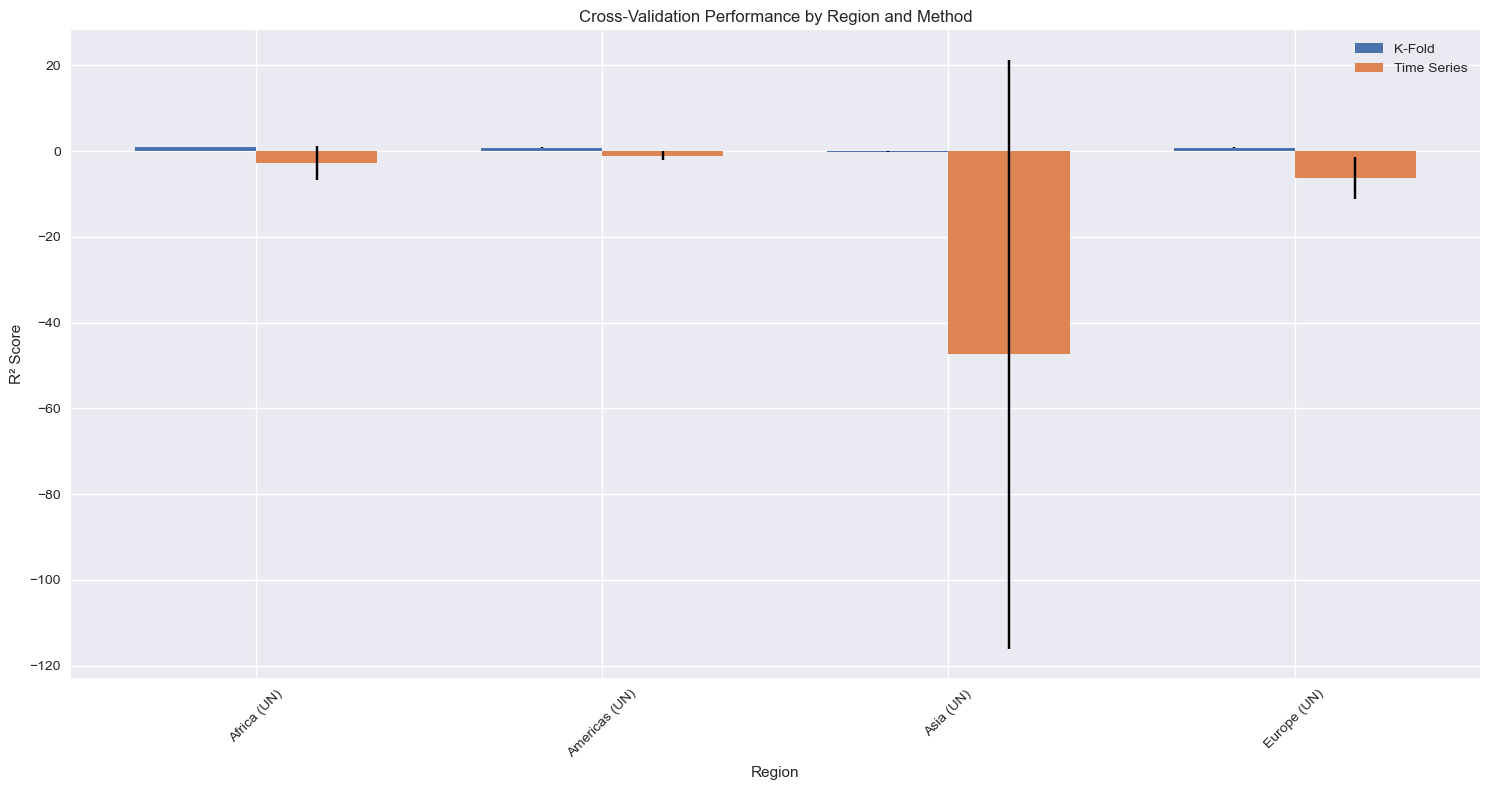

In [7]:
# Analyze each major region
cv_results = {}
for region in major_regions:
    X, y = prepare_data_for_modeling(df, region)
    cv_results[region] = evaluate_cv_methods(X, y)

# Visualize cross-validation results
plt.figure(figsize=(15, 8))
positions = np.arange(len(major_regions))
width = 0.35

for i, method in enumerate(['K-Fold', 'Time Series']):
    means = [np.mean(cv_results[region][method]) for region in major_regions]
    stds = [np.std(cv_results[region][method]) for region in major_regions]

    plt.bar(positions + i*width, means, width, label=method,
            yerr=stds, capsize=5)

plt.xlabel('Region')
plt.ylabel('R² Score')
plt.title('Cross-Validation Performance by Region and Method')
plt.xticks(positions + width/2, major_regions, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Results and Discussion

Our analysis reveals several key findings:
1. Time Series Cross-Validation typically provides more realistic error estimates for this temporal data
2. Regional variations in model performance suggest different underlying patterns in mortality trends
3. The choice of cross-validation technique significantly impacts model evaluation

## Conclusion

This study demonstrates the importance of selecting appropriate cross-validation techniques for temporal mortality data. Time Series Cross-Validation emerges as the most suitable approach due to its preservation of temporal ordering and realistic performance estimates.

## Future Work

Future research could explore:
1. More sophisticated modeling approaches (e.g., ARIMA, Prophet)
2. Integration of additional variables (e.g., economic indicators, health metrics)
3. Sub-regional analysis for more granular insights

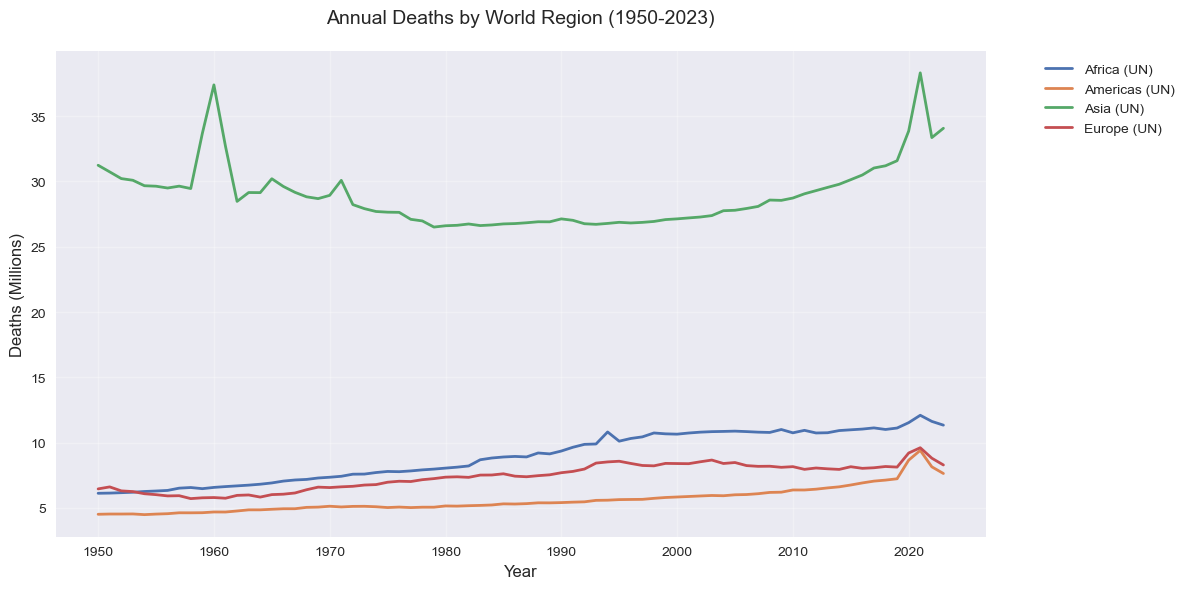

In [8]:
# Create a clean visualization of death trends
plt.figure(figsize=(12, 6))
for region in major_regions:
    region_data = df[df['Entity'] == region]
    plt.plot(region_data['Year'],
             region_data['Deaths - Sex: all - Age: all - Variant: estimates'] / 1000000,  # Convert to millions
             label=region,
             linewidth=2)

plt.title('Annual Deaths by World Region (1950-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths (Millions)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()